### Step: 1 Loading the Data from Digits Dataset¶
shows the total number of data records along with its dimension and number of labeled data.


In [1]:
from sklearn.datasets import load_digits 
import matplotlib.pyplot as plt
import numpy as np

Image Data Info:  (1797, 64)
Label Data Info:  (1797,)


<Figure size 432x288 with 0 Axes>

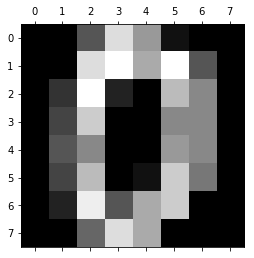

In [2]:
digits = load_digits()
print("Image Data Info: ",digits.data.shape)
print("Label Data Info: ",digits.target.shape)
plt.gray() ## Already gray
plt.matshow(digits.images[0])


### Step: 2 Showing the images and the Labels from the Digits Dataset provides a visualization of data currently in use


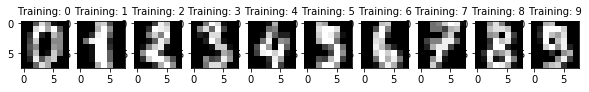

In [3]:
plt.figure(figsize=(10,4))
for index,(image,label) in enumerate(zip(digits.data[0:10],digits.target[0:10])):
    plt.subplot(1,10,index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i'% label,fontsize=10)

### Step: 3 Splitting Data into Training and Test Sets (Digital Dataset)
This will be used to show well our classification algorithm fares over the new data.


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target,
                                                    test_size=0.25,
                                                    random_state=0)

In [5]:
print(x_train.shape,"\n")
print("x-train[0]",x_train[0])
print("y-train[0]",y_train[0])
print(y_train.shape)
print(y_test.shape)

(1347, 64) 

x-train[0] [ 0.  3. 13. 16.  9.  0.  0.  0.  0. 10. 15. 13. 15.  2.  0.  0.  0. 15.
  4.  4. 16.  1.  0.  0.  0.  0.  0.  5. 16.  2.  0.  0.  0.  0.  1. 14.
 13.  0.  0.  0.  0.  0. 10. 16.  5.  0.  0.  0.  0.  4. 16. 13.  8. 10.
  9.  1.  0.  2. 16. 16. 14. 12.  9.  1.]
y-train[0] 2
(1347,)
(450,)


### Step: 4 Modeling Pattern of scikit learn
        1 Import the model you want to use.
        2 Make an instance of the model.
        3 Train the model over the data and store the information 
          learned from the data. This helps trained Model to learn 
          the relationship between digits and labels (x_train &
          y_train)
        4 Predict labels for new data (new images) Using the 
          information the model learned through the model training 
          process.



In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
logisticRegres = LogisticRegression()
logisticRegres.fit(x_train,y_train)

x = logisticRegres.predict(x_test[0].reshape(1,-1))
print(x)
y = logisticRegres.predict(x_test[0:10])
print(y)
z = logisticRegres.predict(x_test)
print(z)

[2]
[2 8 2 6 6 7 1 9 8 5]
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 8 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 4 7 4 8 5 8 5 5 2 5 9 0 7 1 4 1 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 1 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 1 9 6 4 5 0 1 4 6 4 3 3 0 9 5 3 2 1 4 2 1 6 9 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 3 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 3 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 6 7 2 0 9 6 0 4 2 0 7 8 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 8 9
 5 6 2 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 2 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 1 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 9 3 2 6 5 5 9 1 3 7 0 0 3 0 4 5 9 3 3 4 3 1 8 9 8 3 6 3 1 6 2
 1 7 5 5 1 9]


### Step: 5 Measuring Performance of the Model
To see how the model performs on the new data (test data), we will use accuracy as our metric.
#### Accuracy = (number of correct predictions)/ (total predictions)

In [8]:
# Using score method to find out accuracy of model.
accuracyScore = logisticRegres.score(x_test,y_test)
print("The Accuracy of logisticRegres Model on Digits Datasets is ", format(accuracyScore,".2%"))

The Accuracy of logisticRegres Model on Digits Datasets is  95.33%


### Step: 6 Displaying the performance of the Classifier on Test Data using Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which true values are known.


In [9]:
from sklearn import metrics
# metrics has functions related to precision, recall, fscore etc. 
# Actual Values (y_test) vs Predicted values (z)

confusionMatrix = metrics.confusion_matrix(y_test, z)
print(confusionMatrix)


[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


#### Take  : Download different blurred or distorted images of digits from real life images. Test the prediction with the following code. Note your observations.

image = plt.imread("test_image.jpg")

print(image.shape)

predicted_value=logisticRegres.predict(image.reshape(-64,64))
print(predited_value[0])
plt.imshow(image)
_________________________________________________________
